In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import countplot
import seaborn as sns
from matplotlib.pyplot import figure, show
from datetime import datetime
import numpy as np

In [2]:
#Pipeline incident in Alberta leads to unimaginable consequences. Below is a dataset of pipeline in some regions of 
#Alberta pipeline incident recorded between the years of 1975 to 2011. I want to see what pipeline source has the 
#most and least incidents and how long it takes to complete the incident. Some other parameters will be looked closer 
#and to quanitfy as well. Graphs will display the results of the investigation.

# Read the file in csv
df = pd.read_csv(r"C:\Users\alloq\OneDrive\Desktop\PipelineSpillsAB.csv") 
# create a new dataframe with the necessary columns
df1 = df[['IncidentNumber', 'IncidentDate', 'IncidentNotificationDate', 'IncidentCompleteDate',
'Source', 'CauseType', 'FieldCentre', 'PublicAffected', 'EnvironmentAffected', 'WildlifeLivestockAffected', 
'AreaAffected', 'PublicEvacuatedCount', 'ReleaseCleanupDate' ]]

df1.head()

,IncidentNumber,IncidentDate,IncidentNotificationDate,IncidentCompleteDate,Source,CauseType,FieldCentre,PublicAffected,EnvironmentAffected,WildlifeLivestockAffected,AreaAffected,PublicEvacuatedCount,ReleaseCleanupDate
0,19940265,1/15/1994,1/15/1994,1/16/1994,Oil Well,Conversion,Medicine Hat,Conversion from ENV system,Air/Land,Conversion from ENV system,Conversion from ENV system,NaN,1/16/1994
1,20070857,3/29/2007,3/29/2007,6/12/2007,Natural Gas Pipeline,Internal corrosion,Medicine Hat,No affect/Normal Notification,Air/Land,No affect,100 square meters or less,0.0,3/30/2007
2,20080779,3/21/2008,3/21/2008,4/18/2008,Natural Gas Pipeline,Internal corrosion,Medicine Hat,No affect/Normal Notification,Air/Land,No affect,100 square meters or less,0.0,4/17/2008
3,20080862,4/3/2008,4/3/2008,4/18/2008,Natural Gas Pipeline,Internal corrosion,Medicine Hat,No affect/Normal Notification,Air/Land,No affect,100 square meters or less,0.0,NaN
4,20022806,11/30/2002,11/30/2002,11/30/2002,Crude Oil Group Battery,Conversion,Medicine Hat,Conversion from ENV system,Air/Land,Conversion from ENV system,Conversion from ENV system,NaN,11/30/2002


In [3]:
df1.info()
#We can see the dataset has 61587 incidents recorded.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61587 entries, 0 to 61586
Data columns (total 13 columns):
IncidentNumber               61587 non-null int64
IncidentDate                 61587 non-null object
IncidentNotificationDate     61587 non-null object
IncidentCompleteDate         60850 non-null object
Source                       61541 non-null object
CauseType                    61404 non-null object
FieldCentre                  61587 non-null object
PublicAffected               60899 non-null object
EnvironmentAffected          54548 non-null object
WildlifeLivestockAffected    60899 non-null object
AreaAffected                 60899 non-null object
PublicEvacuatedCount         8859 non-null float64
ReleaseCleanupDate           58897 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 6.1+ MB


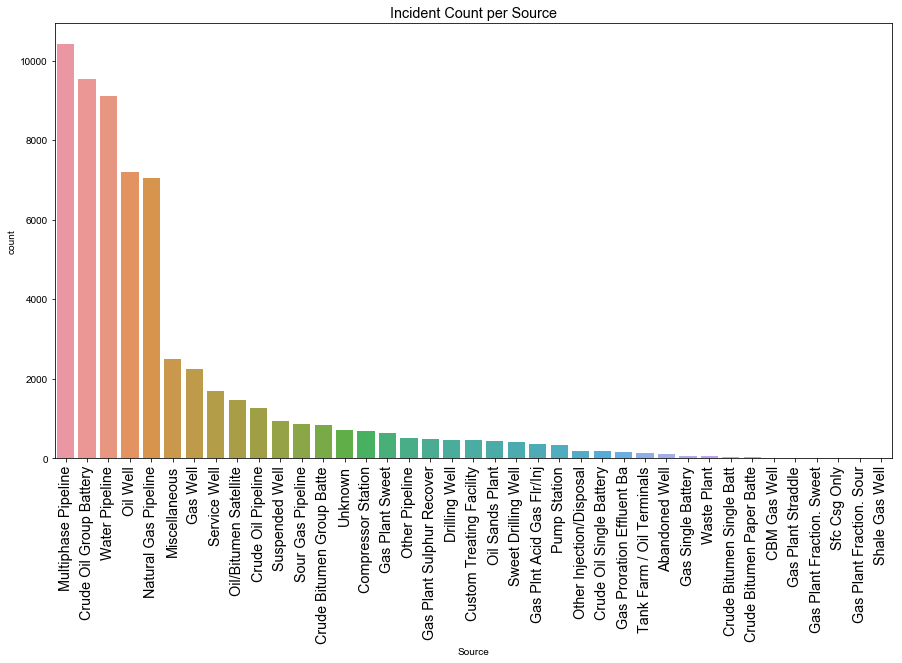

In [4]:
# perform a count plot on the Source column to count the incident frequency from each source
width = 15
height = 8
figure(figsize = (width,height))
ax = sns.countplot(x = df1['Source'], data = df1, order = df1['Source'].value_counts().index)
sns.set(rc={"figure.figsize": (8, 4)})

ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize = 'large')
ax.set_title("Incident Count per Source", fontsize = 'large')
ax
show()

In [5]:
#We can see that the Multiphase Pipeline, Crude Oil Group Battery, Water Pipeline, Oil Well 
#and Natural Gas Pipeline have the most incidents. These are probably the most common pipelines found in Alberta

#Next we will look into the incident notification delay and how long it takes to complete and recover the incident. 
#The columns we will look into are the 'IncidentDate', 'IncidentNotificationDate' and 'IncidentCompleteDate'
#convert into date and time type, and format the date columns in floats from datetime type
date_Incident = pd.to_datetime(df['IncidentDate'],
                              format='%m/%d/%Y')

In [6]:
date_Notification = pd.to_datetime(df1['IncidentNotificationDate'], format = '%m/%d/%Y')

In [7]:
date_IncidentComplete = pd.to_datetime(df1['IncidentCompleteDate'], format = '%m/%d/%Y')

In [8]:
date_release = pd.to_datetime(df1['ReleaseCleanupDate'], format = '%m/%d/%Y')

In [9]:
df1['NotificationDelay'] =  date_Notification.sub(date_Incident, axis = 0)
df1['IncidentDelay'] = date_IncidentComplete.sub(date_Incident, axis = 0)

C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
df1['NotificationDelay'] = df1['NotificationDelay']/ np.timedelta64(1, 'D')
df1['IncidentDelay'] = df1['IncidentDelay']/np.timedelta64(1, 'D')
                                                        

C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
#Check any observation which has a negative day units. These are the records contain no dates or false dates recorded.
(df1['IncidentDelay']<0).any()

False

In [12]:
#This is the notification delay statistical summary. The units are in days. The mean notification delay is 2.4 days
#The 75% quartile is zero indicates majority of the notification delay is within one day. This indicates quick response
df1['NotificationDelay'].describe()

count    61587.000000
mean         2.418335
std         89.742988
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      10469.000000
Name: NotificationDelay, dtype: float64

In [13]:
#The 'IncidentDelay' column is the overall time delay from incident begin until incident complete. Majority of the
#days to complete the incident is within 111 days. The mean delay is around 300 days.
df1 = df1.drop(df1[df1.IncidentDelay <0].index)
df1.IncidentDelay.describe()
#I dropped the observations which contain no incident completion dates or false incident completion dates recorded
#The total incidents delay correctly observed is 60848.

count    60848.00000
mean       298.77927
std        914.06298
min          0.00000
25%          1.00000
50%         10.00000
75%        111.00000
max      18269.00000
Name: IncidentDelay, dtype: float64

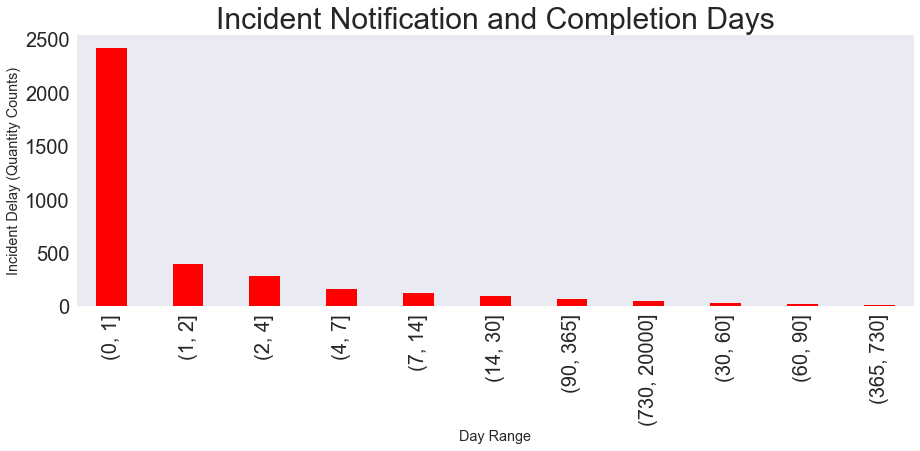

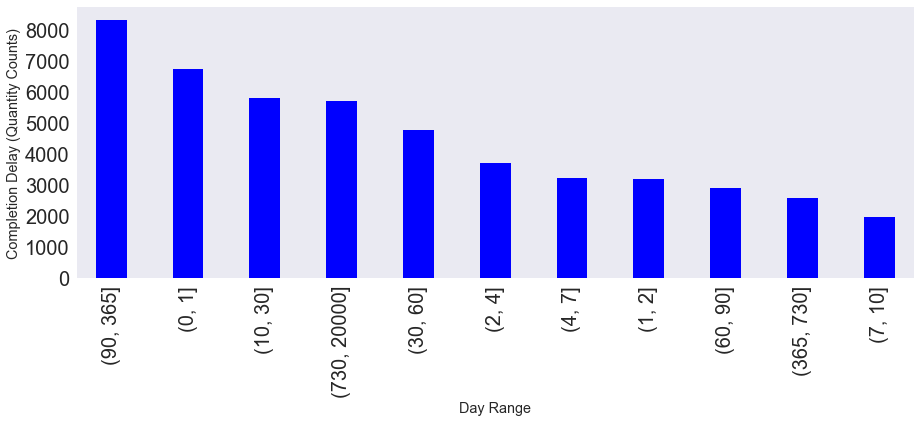

In [14]:
#The counts of notification delay and incident completion days are ploted in bar charts below.
#The X-axis is the days range and Y-axis is the quantity counts. Both charts are in descending order from highest
#counts to lowerst counts.

IND = df1[['NotificationDelay']].apply(lambda x: pd.cut(x, 
bins=[0, 1, 2, 4, 7, 14, 30, 60, 90, 365, 730, 20000]).value_counts())
ICD = df1[['IncidentDelay']].apply(lambda x: pd.cut(x, 
bins=[0, 1, 2, 4, 7, 10, 30, 60, 90, 365, 730, 20000]).value_counts())

#fig = plt.figure()
#ax = fig.add_subplot(211) # Create matplotlib axes
#bx = fig.add_subplot(212) # Create another axes that shares the same x-axis as ax.
bins = [0, 1, 2, 4, 7, 14, 30, 60, 90, 365, 730, 20000]
ax = IND.plot.bar(legend = False,  figsize=(15,5), grid = None, color = 'red', 
                  title = 'Incident Notification and Completion Days', width = 0.4, fontsize = 20)
bx = ICD.plot.bar(legend = False,  figsize=(15,5), grid = None,  color = 'blue', width = 0.4, fontsize = 20)

ax.set_ylabel('Incident Delay (Quantity Counts)', fontsize = 'large')
bx.set_ylabel('Completion Delay (Quantity Counts)', fontsize = 'large')

ax.set_xlabel("Day Range", fontsize='large')
bx.set_xlabel("Day Range", fontsize='large')
ax.title.set_size(30)
ax.grid(b = None)
bx.grid(b = None)

plt.show()

#We see that many of the incident was notified within 1 day. 
#Most of incident completion days are between 3 months to one year. 
#Some incident completed within one day, and others are within two days, a week and more than 2 years.


In [28]:
df1_year1 = df1[~(df1.IncidentDelay > 365)]
df1_year1['IncidentDelay'].describe()

#We see there are 52539 incidents completed within a year. There are about 60848 incidents counts in this
#data sets. That is more than 85% of the incident data!

count    52539.000000
mean        41.353509
std         73.554529
min          0.000000
25%          1.000000
50%          5.000000
75%         47.000000
max        365.000000
Name: IncidentDelay, dtype: float64

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text xticklabel objects>)

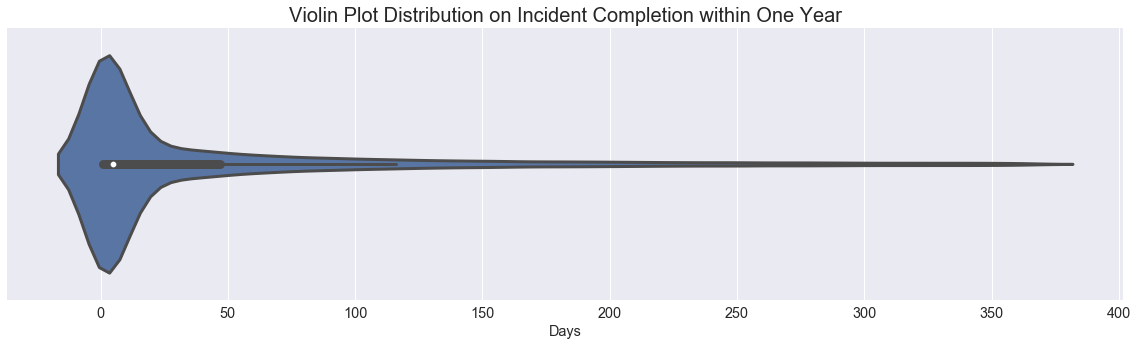

In [29]:
plt.figure(figsize=(20,5))
cx = sns.violinplot(x = df1_year1['IncidentDelay'], linewidth = 3, fontsize = 20)
plt.xlabel('Days', fontsize = 'large')
plt.title('Violin Plot Distribution on Incident Completion within One Year', fontsize = 20)
plt.xticks(fontsize = 'large')

In [30]:
df1_year2 = df1[~(df1.IncidentDelay > 730)]
df1_year2 = df1_year2[~(df1_year2.IncidentDelay <= 365)]
df1_year2['IncidentDelay'].describe()

count    2600.000000
mean      520.237308
std       106.505634
min       366.000000
25%       427.000000
50%       506.000000
75%       609.000000
max       730.000000
Name: IncidentDelay, dtype: float64

(array([300., 350., 400., 450., 500., 550., 600., 650., 700., 750.]),
 <a list of 10 Text xticklabel objects>)

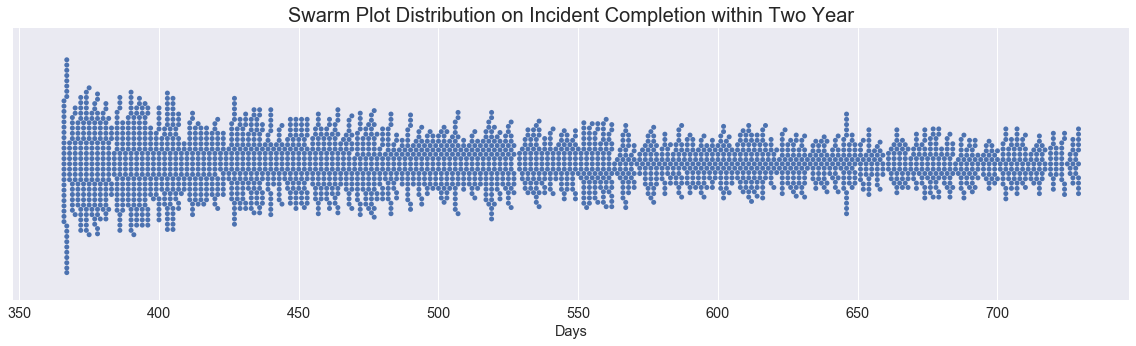

In [18]:
plt.figure(figsize=(20,5))
dx = sns.swarmplot(x = df1_year2['IncidentDelay'])
plt.xlabel('Days', fontsize = 'large')
plt.title('Swarm Plot Distribution on Incident Completion within Two Year', fontsize = 20)
plt.xticks(fontsize = 'large')

#The distribution after one year and before two year is almost even with most incidents completed before the 
#the first half of the second year. This is only 4.2 percent of the total incidents!

In [31]:
df1_late = df1[~(df1.IncidentDelay <= 730)]
df1_late.IncidentDelay.describe()

count     5709.000000
mean      2566.970047
std       1753.184038
min        731.000000
25%       1127.000000
50%       1906.000000
75%       3704.000000
max      18269.000000
Name: IncidentDelay, dtype: float64

(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000.]), <a list of 10 Text xticklabel objects>)

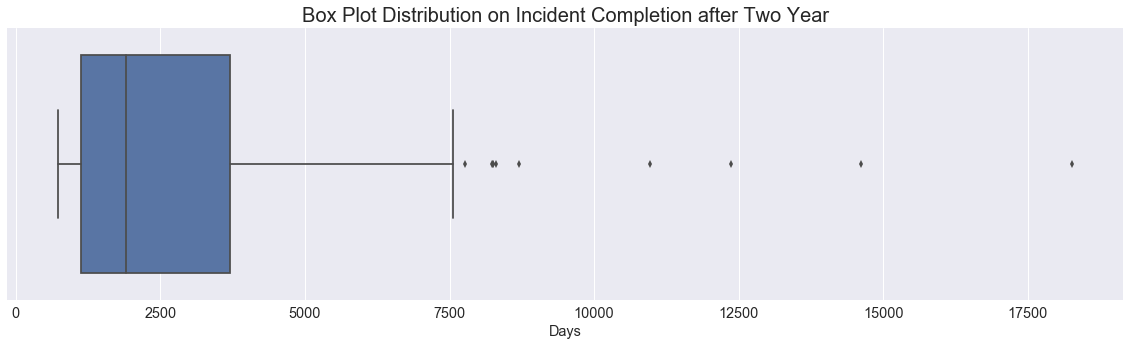

In [20]:
plt.figure(figsize=(20,5))
ex = sns.boxplot(x = df1_late['IncidentDelay'])
plt.xlabel('Days', fontsize = 'large')
plt.title('Box Plot Distribution on Incident Completion after Two Year', fontsize = 20)
plt.xticks(fontsize = 'large')
#The plot only accounts for 9.4 percent of the incident recorded in the dataset. Some outliers exist after 7500 days to
#18000 plus days. That is 20 years to 50 years! 

In [38]:
dfs = df1[df1['IncidentDelay'] > 7500]
dfs
#The records show the incident delays higher than 7500 days which is roughly 20 years. Verify the recorded information
#is accurate. Majority of the sources are oil and few are water and multiphase pipelines.

,IncidentNumber,IncidentDate,IncidentNotificationDate,IncidentCompleteDate,Source,CauseType,FieldCentre,PublicAffected,EnvironmentAffected,WildlifeLivestockAffected,AreaAffected,PublicEvacuatedCount,ReleaseCleanupDate,NotificationDelay,IncidentDelay
7517,19750543,5/1/1975,5/1/1975,1/27/1998,Crude Oil Group Battery,Conversion,Medicine Hat,Conversion from ENV system,Air/Land,Conversion from ENV system,Conversion from ENV system,NaN,1/27/1998,0.0,8307.0
12925,19750755,6/16/1975,6/16/1975,1/1/1998,Water Pipeline,Conversion,Wainwright,Conversion from ENV system,Air/Land,Conversion from ENV system,Conversion from ENV system,NaN,1/1/1998,0.0,8235.0
13377,19962698,11/28/1966,11/28/1966,11/29/1996,Oil Well,Conversion,Wainwright,Conversion from ENV system,NaN,Conversion from ENV system,Conversion from ENV system,NaN,11/29/1996,0.0,10959.0
17168,20040830,5/11/1975,1/8/2004,3/13/2009,Other Injection/Disposal,Inadequate procedure,Red Deer,No affect/Normal Notification,Air/Land,No affect,over 100 but less than 1000 square meters,NaN,1/8/2004,10469.0,12360.0
24253,19770475,4/15/1977,4/15/1977,1/1/1998,Multiphase Pipeline,Conversion,Wainwright,Conversion from ENV system,Air/Land,Conversion from ENV system,Conversion from ENV system,NaN,1/1/1998,0.0,7566.0
37099,20032669,6/7/1983,3/25/2003,9/7/2004,Crude Bitumen Group Batte,Inadequate procedure,BONNYVILLE,No affect/Normal Notification,Air/Land,No affect,over 1000 square meters,NaN,NaN,7231.0,7763.0
39615,19951905,1/1/1970,1/1/1970,7/29/1992,Oil Well,Conversion,St. Albert,Conversion from ENV system,Air/Land,Conversion from ENV system,Conversion from ENV system,NaN,7/29/1992,0.0,8245.0
39616,19951904,1/1/1970,1/1/1970,7/29/1992,Oil Well,Conversion,St. Albert,Conversion from ENV system,Air/Land,Conversion from ENV system,Conversion from ENV system,NaN,7/29/1992,0.0,8245.0
49783,19750890,7/21/1975,7/21/1975,5/19/1999,Crude Oil Group Battery,Conversion,Grande Prairie,Conversion from ENV system,Air/Land,Conversion from ENV system,Conversion from ENV system,NaN,5/19/1999,0.0,8703.0
53775,19940164,2/4/1944,2/4/1944,2/10/1994,Miscellaneous,Conversion,St. Albert,Conversion from ENV system,Air/Land,Conversion from ENV system,Conversion from ENV system,NaN,2/10/1994,0.0,18269.0


In [21]:
#We will look the incident delay versus source
df2 = df1.groupby('Source')['IncidentDelay'].mean()

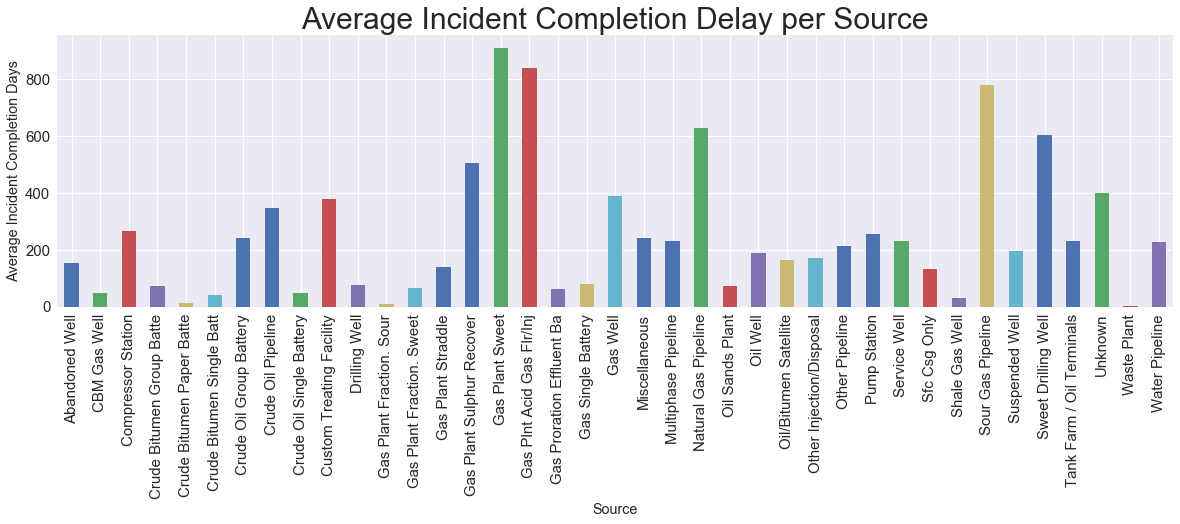

In [22]:
plt.figure(figsize=(20,5))
IncidentMean = df2.plot.bar(title = "Average Incident Completion Delay per Source", fontsize = 15)
IncidentMean.set_xlabel('Source', fontsize = 'large')
IncidentMean.set_ylabel('Average Incident Completion Days', fontsize = 'large')
IncidentMean.title.set_size(30)

#According to the plot, we can see that Gas plant, natural and source gas pipelines have the highest days 
#to complete the incident. The repair days for these pipelines are longer.

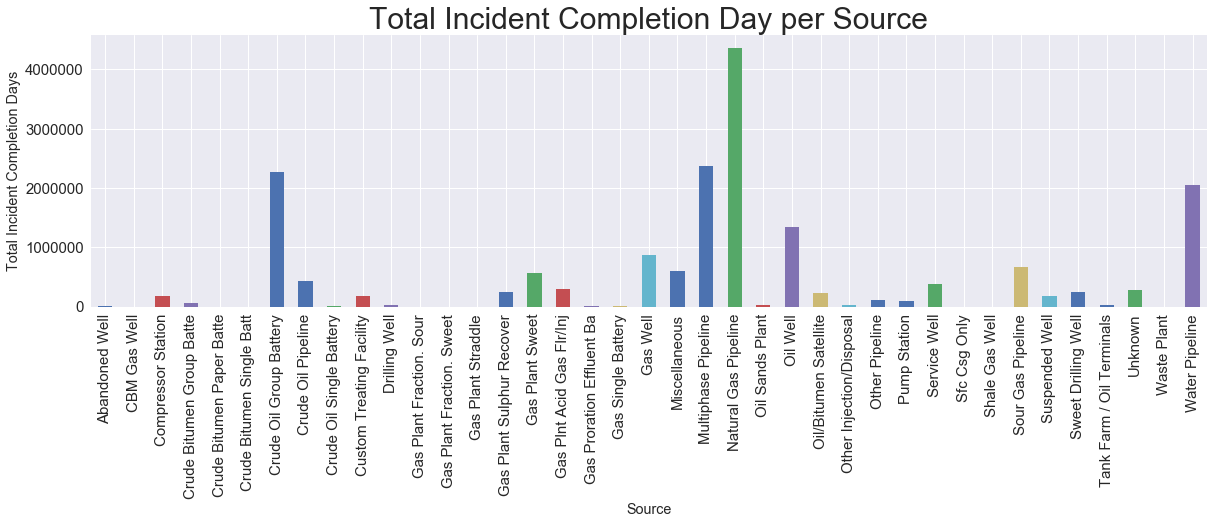

In [23]:
plt.figure(figsize=(20,5))
df3 = df1.groupby('Source')['IncidentDelay'].sum()
IncidentCount = df3.plot.bar(title = "Total Incident Completion Day per Source", fontsize = 15)
IncidentCount.set_xlabel('Source', fontsize = 'large')
IncidentCount.set_ylabel('Total Incident Completion Days', fontsize = 'large')
IncidentCount.title.set_size(30)
# The natural gas pipeline, multiphase pipeline, oil group line, water lines require the most incident completion days.
# The crude oil pipelines and oil wells have more incident counts but shorter incident completion days. 
# The gas pipelines have lower incident counts but takes longer to repair

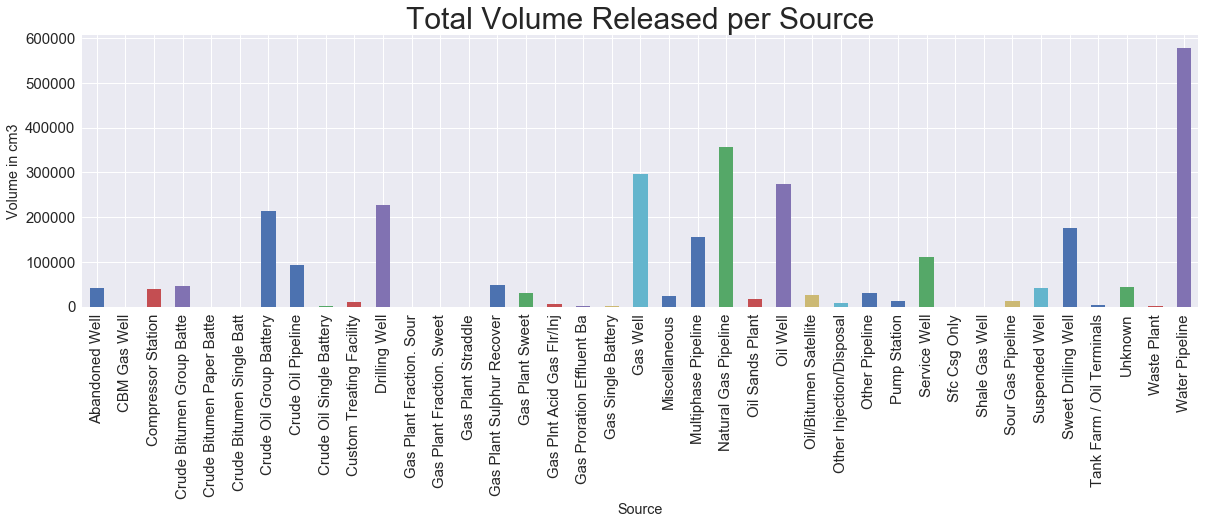

In [24]:
df['TotalVolumeReleased'] = df[['Volume Released', 'Volume Released 2', 'Volume Released 3', 'Volume Released 4']].sum(axis = 1)

df4 = pd.merge(df[['IncidentNumber', 'TotalVolumeReleased']], df1, on = 'IncidentNumber')
df4 = df4[~(df4.TotalVolumeReleased < 0)]
df5 = df4.groupby('Source')['TotalVolumeReleased'].sum()
plt.figure(figsize=(20,5))
dx = df5.plot.bar(title = "Total Volume Released per Source", fontsize = 15)
dx.set_xlabel('Source', fontsize = 'large')
dx.set_ylabel('Volume in cm3', fontsize = 'large')
dx.title.set_size(30)

#As we can see,  Water Pipeline, Natural Gas Pipelines and various wells release the highest volumes of substances.
#Water lines has the most releases in terms of volume.

In [ ]:
#That is all for now! Lots of information can be shown from the dataset. I can display the location and region 
#with the most pipeline incidents. Other features such as affected environment, habitats and public could be applied
#to display useful information.